In [12]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import tensorflow as tf

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
df = pd.read_csv("/content/drive/MyDrive/stock_market_crash_2022.csv")

In [3]:
df

,id,text,text_sentiment,username,hashtags,created_at,user followers count,replycount,retweetcount,likecount,quotecount,language,media,retweetedTweet,quotedtweet,inReplyToTweetId,inReplyToUser,mentionedUsers
0,1538666561615015938,When will the #NYSE #stockmarketcrash happen?,Neutral,tradexlnc,"['NYSE', 'stockmarketcrash']",2022-06-19 23:34:29+00:00,10669,0,0,1,0,en,NaN,NaN,NaN,NaN,NaN,NaN
1,1538665013799489536,Aaj ka gyan:\n\nIf a company isn't a quality c...,Negative,niftymonday,"['stockmarkets', 'stockmarketcrash', 'trading'...",2022-06-19 23:28:20+00:00,100,0,1,8,0,en,NaN,NaN,NaN,NaN,NaN,NaN
2,1538660868027830274,The stock market needs to crash hard to make i...,Negative,kyle132313,"['stockmarketcrash', 'economy', 'rich', 'Fed']",2022-06-19 23:11:52+00:00,0,0,0,0,0,en,NaN,NaN,NaN,NaN,NaN,NaN
3,1538657239849836544,"Those who are ""Buying on DIP"" will very soon b...",Neutral,ChintanRajput16,"['stockmarketcrash', 'StocksToBuy', 'stockstow...",2022-06-19 22:57:27+00:00,54,0,2,2,0,en,NaN,NaN,NaN,NaN,NaN,NaN
4,1538654339044196358,@rdrhwke I wish our so-called President were t...,Positive,DrPCJustice,"['Bidenomics', 'inflation', 'recession', 'stoc...",2022-06-19 22:45:55+00:00,28,0,0,0,0,en,NaN,NaN,NaN,1.538653e+18,https://twitter.com/rdrhwke,"[User(username='rdrhwke', id=43753976, display..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33941,1477645974382260225,Hey #btc maxis!!\n\nDo you know what a Fibonac...,Neutral,captcrypto2020,"['btc', 'bearmarket']",2022-01-02 14:20:28+00:00,54,2,0,0,0,en,NaN,NaN,NaN,NaN,NaN,NaN
33942,1477633718726672397,@cryptolifemama #XRP and #HBAR will be resista...,Neutral,sharecryptoinfo,"['XRP', 'HBAR', 'bearmarket']",2022-01-02 13:31:46+00:00,24,1,0,2,0,en,NaN,NaN,NaN,1.477320e+18,https://twitter.com/cryptolifemama,"[User(username='cryptolifemama', id=1386086414..."
33943,1477533720894656512,$SPY $SPX\nNotes From a #Market #Degenerate: \...,Positive,LyfeOfPELK,"['Market', 'Degenerate', 'Chinese', 'China', '...",2022-01-02 06:54:24+00:00,576,2,1,2,0,en,NaN,NaN,NaN,NaN,NaN,NaN
33944,1477472665799733249,@chip82many @GarethSoloway Depends if you thin...,Positive,i_danforth,"['BullMarket', 'BearMarket', 'onchain']",2022-01-02 02:51:48+00:00,326,1,0,0,0,en,NaN,NaN,NaN,1.477398e+18,https://twitter.com/chip82many,"[User(username='chip82many', id=2369790510, di..."


In [4]:
# checking null values
df.isna().sum()

,0
id,0
text,0
text_sentiment,0
username,0
hashtags,1
created_at,0
user followers count,0
replycount,0
retweetcount,0
likecount,0


In [5]:
# labeling the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["sentiment"] = le.fit_transform(df["text_sentiment"])
df["sentiment"] = df["sentiment"].apply(lambda x: "positive" if x == 2 else "negative")
df["sentiment"] = le.fit_transform(df["sentiment"])

In [6]:
df["text_sentiment"].value_counts()

,count
text_sentiment,
Positive,12542
Neutral,11498
Negative,9906


In [7]:
df["sentiment"].value_counts()

,count
sentiment,
0,21404
1,12542


In [8]:
# Processing of text Using Stopwords & Lematization Technique
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
def remove_stopwords(text):
  all_stopwords = set(stopwords.words("english"))
  text = re.sub("[^a-zA-Z]"," ",text)
  text = text.lower()
  text = text.split()
  filtered_words = [w for w in text if w not in all_stopwords]
  lemmatizer = WordNetLemmatizer()
  filtered_words = [lemmatizer.lemmatize(w) for w in filtered_words]
  return " ".join(filtered_words)

In [13]:
# Applying the custom function on text column
df["text"] = df["text"].apply(remove_stopwords)

In [14]:
# Importing embedding layer
from gensim.models import Word2Vec

In [16]:
# Download twitter dataset with 200 dimensions
import gensim.downloader as api
wordvec = api.load('glove-twitter-200')

[==================================================] 100.0% 758.5/758.5MB downloaded


In [25]:
# Create an embedding matrix by assigning vectors to pre trained model
sentence_embedding = []
for sentence in df['text']:
  words = sentence.split()
  embedding = [wordvec[word] for word in words if word in wordvec]
  if embedding:
    sentence_embed = np.mean(embedding, axis=0)
    sentence_embedding.append(sentence_embed)
  else:
    sentence_embedding.append(np.zeros(wordvec.vector_size))

In [26]:
# Splitting the data and reshaping it to 3 Dimension
from sklearn.model_selection import train_test_split
X = np.array(sentence_embedding)
Y = df["sentiment"]

X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=69)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [27]:
# Checking its shape
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((27156, 1, 200), (6790, 1, 200), (27156,), (6790,))

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.callbacks import EarlyStopping

In [49]:
# Creating a LSTM model
model = Sequential()
model.add(LSTM(150))
model.add(Dense(1, activation = "sigmoid"))
model.compile(loss="binary_crossentropy", optimizer= "adam", metrics=["accuracy"])

In [50]:
# Training the model
model.fit(X_train, Y_train, epochs=11, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/11
849/849 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7022 - loss: 0.5717 - val_accuracy: 0.7480 - val_loss: 0.5104
Epoch 2/11
849/849 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7677 - loss: 0.4849 - val_accuracy: 0.7627 - val_loss: 0.4893
Epoch 3/11
849/849 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7822 - loss: 0.4635 - val_accuracy: 0.7633 - val_loss: 0.4840
Epoch 4/11
849/849 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7842 - loss: 0.4556 - val_accuracy: 0.7791 - val_loss: 0.4673
Epoch 5/11
849/849 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7921 - loss: 0.4408 - val_accuracy: 0.7828 - val_loss: 0.4645
Epoch 6/11
849/849 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7968 - loss: 0.4325 - val_accuracy: 0.7820 - val_loss: 0.4610
Epoch 7/11
849/849 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8065 - loss: 0.4184 - val_accuracy: 0.7778 - val_loss: 0.4652
Epoch 8/11
849/849 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8126 - loss: 0.4037 - val_accuracy: 

In [51]:
# Predicting the values
y_pred = model.predict(X_test)

213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(50.722222222222214, 0.5, 'Actual Values')

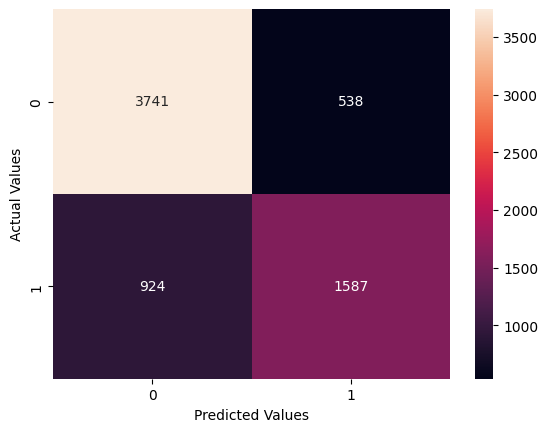

In [52]:
# Evaluation of metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cm = confusion_matrix(Y_test, y_pred.round())
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [53]:
# Getting Accuray score & Classification report
print(accuracy_score(Y_test, y_pred.round()))
print(classification_report(Y_test, y_pred.round()))

0.7846833578792342
              precision    recall  f1-score   support

           0       0.80      0.87      0.84      4279
           1       0.75      0.63      0.68      2511

    accuracy                           0.78      6790
   macro avg       0.77      0.75      0.76      6790
weighted avg       0.78      0.78      0.78      6790



# **Conclusion**

* The dataset used contains over 100,000 rows of financial news headlines with sentiment labels (positive, negative/neutral).
* The dataset was preprocessed to handle missing values and convert sentiment labels to numerical format (0 for negative/neutral, 1 for positive).
* Stop words were removed, and text was lemmatized using NLTK to improve model performance.
* Word embeddings were generated using pre-trained GloVe embeddings (glove-twitter-200) to represent words numerically.
* An LSTM (Long Short-Term Memory) model was implemented for sentiment analysis.The model was trained on 80% of the data and validated on the remaining 20%.
* The model achieved an accuracy score of 78%.
* This project demonstrates the potential of using natural language processing and machine learning for financial market analysis.  